Classifying Palmer Penguins

In [3]:
#We import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


We then load in the data and drop any NaN rows. We also find out how many unique species exist.

In [4]:
# Load the Palmer Penguins dataset and drop NaN rows
penguins = pd.read_csv(r"C:\Users\faith\inde 577\577repo\Supervised Learning\1_Perceptron\palmer_penguins.csv")
penguins = penguins.dropna()

#We find out that there are three distinct penguin species.
penguins['species'].unique() 

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

We will remove one of the penguin species, because this is a binary classification problem, after all. As such, we will just be sorting between Adelie and Chinstrap penguins. We can also draw boundaries between 2+ categories, but for the sake of this notebook, we will just do two.

In [5]:
penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]
penguins['species'].unique() 


array(['Adelie', 'Chinstrap'], dtype=object)

We assign target variables with values.

In [6]:
# Select features and target variable
X = penguins[['bill_length_mm', 'bill_depth_mm']].values

# Convert each entry of y with Adelie to -1 and otherwise 1
y = penguins.species.values
y = np.where(y == 'Adelie', -1, 1)


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# We train on the built-on Perceptron module. This has a default epoch value of 1000.
clf = Perceptron()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#The accuracy is pretty good!

Accuracy: 0.9692307692307692


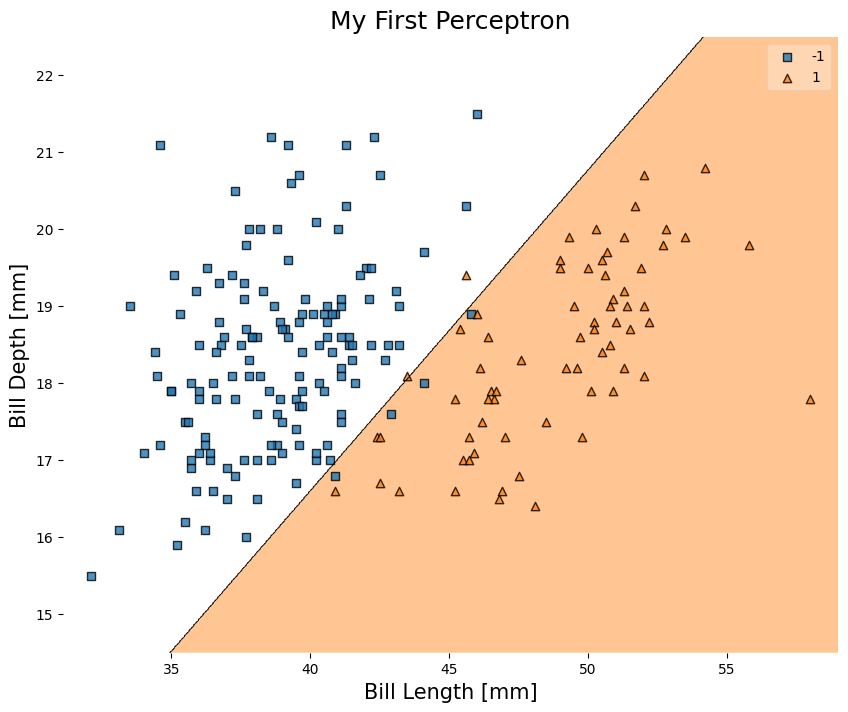

In [10]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Depth [mm]", fontsize = 15)
plt.show()